# In Class Exercise: Intro to Supervised Learning

## 12/15/2021

**1. In markdown, describe KNN in your own words.**

K-Nearest Neighbors (KNN) is a method for predicting data classifications or regressions. These predictions are based on the object's distance to other data points (K neighbors). The object will be "classified" based on a "majority vote" from the K-nearest neighbors. For example, if K=4, the object will be assigned to the classification of whatever the majority is of the 4 nearest points. For KNN regression, the output will be the average value of the K nearest neighbors. 

**2. Using the KNN example from class, write a function that finds the optimal value for k. You should iterate over a range of values and return the k and the score when the accuracy score is maximized. Be sure to only use odd values.**

In [70]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [71]:
# Read in file and create data frame
diabetes_df = pd.read_csv("diabetes.csv")
# View data frame
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Create the predictor variables (drop everything, except the target)
X = diabetes_df.drop('Outcome', axis=1)
# Create the target variable (outcome)
y = diabetes_df['Outcome']

# Create the training data and the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Standardization - transforming values so that mean is 0 and SD is 1
from sklearn.preprocessing import StandardScaler
# Create the standard scaler object 
sc = StandardScaler()
# Fit the training data 
X_train = sc.fit_transform(X_train)
# Fit the testing data
X_test = sc.fit_transform(X_test)

In [68]:
# Write function to test best score
    # Test several values for the n_neighbors

### 28 rule of thumb of where to start: square root of number of rows

# Create lists to append to
accuracy_list = []
K_list = []

def best_score():   
    # Create a range for K to be in
    for k in range(0,50):
        # Check that K is odd (that way we don't have ties)
        if k%2 !=0:
            # Set the K-neighbors classifier
            knn = KNeighborsClassifier(n_neighbors=k)
            # Fit to the training data
            knn.fit(X_train, y_train)
            # Predict the testing data
            y_predict = knn.predict(X_test)
            # Find the score
            score = knn.score(X_test, y_test)
            # append the score to the accuracy list
            accuracy_list.append(score)
            # append the K value to the K_list
            K_list.append(k)
    else:
        pass
    
    # Create data frame that contains the values from our two lists
    knn_df = pd.DataFrame({'Score':accuracy_list,
                          'K': K_list})
    # Sort df by maximum score (highest to lowest), and then by K (lowest to highest)
    # Change the index to match the sorted data
    knn_sort = knn_df.sort_values(['Score','K'], ascending=[False,True], ignore_index=True)
    
    # Return the top row of the df
    print(knn_sort.loc[0])

    # Build the scatter plot
    g = sns.scatterplot(data=knn_sort,
                    x='K',
                    y='Score',
                    color='m',
                    hue='Score',
                    alpha=0.9,
                    edgecolor='grey',
                    linewidth=0.8,
                    legend=False)

    # Add plot title and adjust the y-axis label to include units
    g.set_title('K Values with Score', size=14, weight='bold', pad=15)  

    # Display plot
    plt.show()

Score     0.779221
K        15.000000
Name: 0, dtype: float64


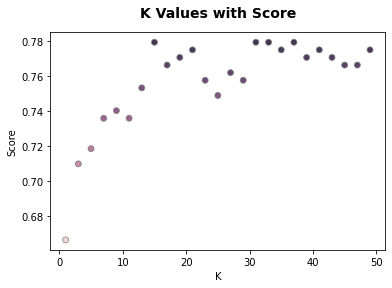

In [69]:
# Call our function to print the best score and display scatter plot of values
best_score()

K value of 15 is the best because it is the lowest K value, with the highest score

**3. How did the panel influence your thoughts about working in tech, specifically work in the data realm? Discuss with your group and summarize your thoughts in under 250 words.**

I enjoyed learning about the wide variety of tasks that everyone on the panel has. It was also encouraging to hear that there is a large appetite for mentorship and learning within the tech industry. The discussion made me think that the tech industry might be more "inviting" and welcoming than I had previously thought. It can be really intimidating, assuming that you must know "everything" before starting a job. I especially loved hearing about Susan's stories of needing to learn different tools on the fly. When I browse various job descriptions, the number of different tools businesses use can be overwhelming. It is nice to know that some of those tools can be learned on the job. 

At the same time, the panel really made me reflect on where I "fit" within the tech industry, because that is still unclear to me. I am trying to determine what my own strengths are and what my own next steps should be, regarding my professional development. I might want to take additional math courses or even consider getting another Masters degree. Because the tech industry seems to welcome growth and learning, I would really like to find mentors who would be willing to help me learn and also help me determine what avenues I should focus on. There are so many titles other than 'Data Scientist,' and I am still unclear on what the nuances are of those different career paths. But this panel definitely has me thinking! I was grateful to be exposed to their world. 